<a href="https://colab.research.google.com/github/amontoy6/Entrega-Notebooks-Lab-2-y-3/blob/main/Consumer_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#analisis de sentimientos en reclamaciones:
# datasets download: https://files.consumerfinance.gov/ccdb/complaints.csv.zip

In [ ]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget -q https://files.consumerfinance.gov/ccdb/complaints.csv.zip
!!unzip complaints.csv.zip

['Archive:  complaints.csv.zip', '  inflating: complaints.csv          ']

In [ ]:
#exploración de datos:
import pandas as pd
df = pd.read_csv('complaints.csv')
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()

<ipython-input-3-11ed8a2b87ea>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
45,2020-10-28,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,STOP ALL CALLS,NaN,Lending Club Corp,FL,33309.0,NaN,Consent provided,Web,2020-10-28,Closed with non-monetary relief,No,NaN,4485088
90,2020-10-29,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,Original creditor : XXXX XXXX XXXX XXXX XXXX ...,NaN,"Dynamic Recovery Solutions, LLC",NJ,8322.0,NaN,Consent provided,Web,2020-10-29,Closed with non-monetary relief,Yes,NaN,4496460
124,2020-07-27,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Unexpected or other fees,NaN,"On XX/XX/2020, I sold a bike using XXXX XXXX. ...",NaN,"Paypal Holdings, Inc",TX,76137.0,NaN,Consent provided,Web,2020-07-27,Closed with non-monetary relief,Yes,NaN,5018142
127,2020-10-31,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,This year we decided to research home loan ref...,NaN,JPMORGAN CHASE & CO.,CA,92506.0,NaN,Consent provided,Web,2020-10-31,Closed with monetary relief,Yes,NaN,4499046
129,2020-10-31,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,Debt Validation and Complaint against Discover...,NaN,DISCOVER BANK,IL,60601.0,Servicemember,Consent provided,Web,2020-10-31,Closed with non-monetary relief,Yes,NaN,4499231


In [ ]:
df.count()

Date received                   976684
Product                         976684
Sub-product                     924512
Issue                           976684
Sub-issue                       793300
Consumer complaint narrative    976684
Company public response         458995
Company                         976684
State                           968754
ZIP code                        968488
Tags                            148813
Consumer consent provided?      976684
Submitted via                   976684
Date sent to company            976684
Company response to consumer    976683
Timely response?                976684
Consumer disputed?              164062
Complaint ID                    976684
dtype: int64

In [ ]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
45,Debt collection,STOP ALL CALLS,0
90,Debt collection,Original creditor : XXXX XXXX XXXX XXXX XXXX ...,0
124,"Money transfer, virtual currency, or money ser...","On XX/XX/2020, I sold a bike using XXXX XXXX. ...",1
127,Mortgage,This year we decided to research home loan ref...,2
129,Debt collection,Debt Validation and Complaint against Discover...,0


In [ ]:
df = df.head(1000)

In [ ]:
df

,Product,Consumer_complaint_narrative,category_id
45,Debt collection,STOP ALL CALLS,0
90,Debt collection,Original creditor : XXXX XXXX XXXX XXXX XXXX ...,0
124,"Money transfer, virtual currency, or money ser...","On XX/XX/2020, I sold a bike using XXXX XXXX. ...",1
127,Mortgage,This year we decided to research home loan ref...,2
129,Debt collection,Debt Validation and Complaint against Discover...,0
...,...,...,...
7763,Credit card or prepaid card,Chase credit card opened and used without my k...,3
7772,Debt collection,Pinnacle Credit Service is attempting to colle...,0
7776,"Credit reporting, credit repair services, or o...","Trans Union, XXXX and XXXX are ignoring my re...",4
7778,Debt collection,There is a medical Debit on my credit that i h...,0


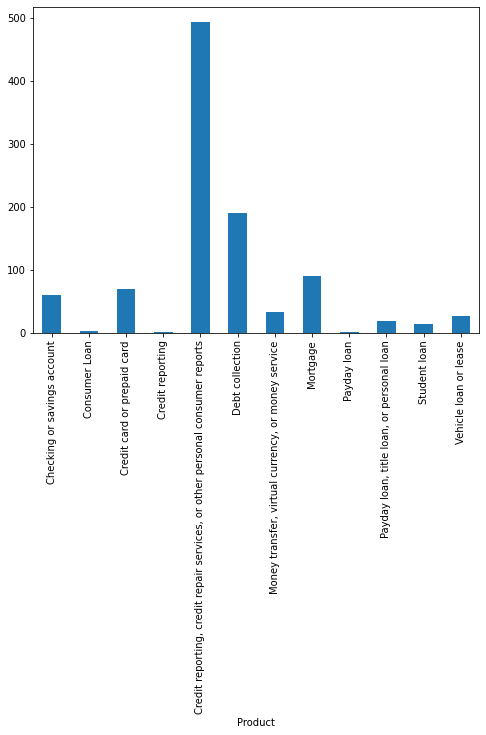

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
df.groupby('Product').Consumer_complaint_narrative.count()

Product
Checking or savings account                                                      60
Consumer Loan                                                                     3
Credit card or prepaid card                                                      70
Credit reporting                                                                  1
Credit reporting, credit repair services, or other personal consumer reports    493
Debt collection                                                                 190
Money transfer, virtual currency, or money service                               33
Mortgage                                                                         90
Payday loan                                                                       2
Payday loan, title loan, or personal loan                                        18
Student loan                                                                     14
Vehicle loan or lease                                               

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(1000, 4309)

In [ ]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07154101, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09146139, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10741117, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. does
. zero
  . Most correlated bigrams:
. documents submitted
. document evidence
# 'Checking or savings account':
  . Most correlated unigrams:
. checking
. pnc
  . Most correlated bigrams:
. direct deposit
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. ca
. financed
  . Most correlated bigrams:
. credit agency
. reported xxxx
# 'Credit card':
  . Most correlated unigrams:
. does
. zero
  . Most correlated bigrams:
. documents submitted
. document evidence
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. 200 00
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. responsible
. lease
  . Most correlated bigrams:
. xx xx
. xxxx xxxx
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. report
  . Most correlated bigrams:
. credit bureaus
. credit report
# '

In [ ]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [ ]:
X_train.count()

750

In [ ]:
X_test

23532    When I investigated my credit report, I realiz...
20013    This is my 7th endeavor to tell you that I am ...
9583     I submitted a dispute to experian twice reques...
15132    This is not my debt this is result of identity...
17151    My name is XXXX XXXX this complaint is not mad...
                               ...                        
13177    on XX/XX/2022 I was notified, not by synchrony...
10531    Please take a look at the attached letters and...
1013     Im submitting a complaint to you today to info...
13385    I did not receive a statement or other notific...
17442    Received call from unknown number this morning...
Name: Consumer_complaint_narrative, Length: 250, dtype: object

In [ ]:
y_train.count()

750

In [ ]:
y_test.count()

250

In [ ]:
#Term Frecuency - TF
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
print(X_train_counts)

  (0, 3133)	1
  (0, 5700)	1
  (0, 1462)	1
  (0, 5963)	10
  (0, 6577)	2
  (0, 5965)	1
  (0, 3245)	1
  (0, 6386)	1
  (0, 5876)	10
  (0, 6320)	1
  (0, 4136)	5
  (0, 3114)	2
  (0, 5879)	3
  (0, 5084)	1
  (0, 4162)	2
  (0, 3061)	1
  (0, 4997)	2
  (0, 2707)	1
  (0, 3420)	3
  (0, 3176)	3
  (0, 3971)	3
  (0, 5036)	4
  (0, 679)	2
  (0, 2696)	1
  (0, 5874)	3
  :	:
  (749, 843)	1
  (749, 2100)	1
  (749, 3246)	2
  (749, 3406)	1
  (749, 798)	1
  (749, 430)	1
  (749, 3425)	1
  (749, 2939)	1
  (749, 5913)	2
  (749, 6515)	1
  (749, 5397)	1
  (749, 3982)	2
  (749, 4998)	1
  (749, 3591)	1
  (749, 986)	1
  (749, 2433)	1
  (749, 437)	1
  (749, 5142)	1
  (749, 4393)	1
  (749, 3209)	3
  (749, 5038)	2
  (749, 1439)	1
  (749, 3192)	1
  (749, 4872)	1
  (749, 6281)	1


In [ ]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
print(X_train_tfidf)

  (0, 5914)	0.05001318791350738
  (0, 5888)	0.01901391602806159
  (0, 5878)	0.06219581999693758
  (0, 5826)	0.09468063419961215
  (0, 5778)	0.6777526535370546
  (0, 5737)	0.02633192060973175
  (0, 5685)	0.04869497008473751
  (0, 5599)	0.2104500323174195
  (0, 5338)	0.05263226008217741
  (0, 5292)	0.09522867321881447
  (0, 5266)	0.036378333613326666
  (0, 5264)	0.04397299703650496
  (0, 5142)	0.14355826382904058
  (0, 4871)	0.08516445209708107
  (0, 4861)	0.06935928252223356
  (0, 4578)	0.05834172202351214
  (0, 4564)	0.066765881421572
  (0, 4563)	0.06629326673980634
  (0, 4527)	0.07113967486280148
  (0, 4524)	0.10107271575140807
  (0, 4509)	0.0925336468773986
  (0, 4498)	0.030469574684631424
  (0, 4228)	0.07313859107609534
  (0, 4012)	0.19603902410422502
  (0, 3888)	0.050536357875704034
  :	:
  (749, 483)	0.02322011642561865
  (749, 474)	0.06112242268481787
  (749, 470)	0.030492583215483784
  (749, 451)	0.09993020152253668
  (749, 441)	0.040084891750082216
  (749, 434)	0.10570257021159

In [ ]:
y_train.count()

750

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf)

MultinomialNB()


In [ ]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


Multinomial NB X train

In [ ]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

import pickle

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

pickle.dump(clf,open("file.model","wb"))

#clf = pickle.load(open("file.model", 'rb'))
#result = clf.score(X_test, Y_test)


In [ ]:
#After fitting the training set, let’s make some predictions.
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [ ]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all \n the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
pd.set_option('max_colwidth', 1000)

In [ ]:
df = pd.read_csv('complaints.csv')

<ipython-input-32-0eca3c9e12e5>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


In [ ]:
df.sample(3).T

,1120822,2422192,416442
Date received,2014-04-16,2020-04-20,2016-04-07
Product,Debt collection,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection
Sub-product,I do not know,Credit reporting,Medical
Issue,Cont'd attempts collect debt not owed,Incorrect information on your report,Disclosure verification of debt
Sub-issue,Debt is not mine,Account status incorrect,Right to dispute notice not received
Consumer complaint narrative,NaN,NaN,"Progressive Management Services refused to negotiate on this debt even though I told them I could n't make it to the next hospital where my XXXX condition would have been evaluated for free. ( VA hospital as I am a Veteran ) Also they are n't reporting the amount I have already paid to the {$1400.00}. I am still owing {$300.00} bout it 's being reported as a {$2000.00} debt. I told them I needed it paid so I could refinance my mortgage and she laughed at me when I asked her to negotiate. I feel this unfair, prejudice and unreasonable of this company."
Company public response,NaN,NaN,Company believes it acted appropriately as authorized by contract or law
Company,"Amsher Collection Services, Inc.","EQUIFAX, INC.","R.M. Galicia, Inc."
State,NY,KS,CA
ZIP code,11106,66062.0,91941.0


In [ ]:
count_vec = CountVectorizer()
bow = count_vec.fit_transform(df['Product'])
bow = np.array(bow.todense())

In [ ]:
X = bow
y = df['Product']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [ ]:
model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.9985910872497681
F1 score: 0.8881494828709169


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00     25862
                                                 Checking or savings account       1.00      1.00      1.00     40594
                                                               Consumer Loan       1.00      1.00      1.00      9480
                                                                 Credit card       1.00      1.00      1.00     26757
                                                 Credit card or prepaid card       0.97      1.00      0.99     43164
                                                            Credit reporting       1.00      1.00      1.00     42129
Credit reporting, credit repair services, or other personal consumer reports       1.00      1.00      1.00    341163
                                                       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
